<a href="https://colab.research.google.com/github/Priyanka2709/MaterialLogin/blob/master/Netflix_Project_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Netflix Project***

*The aim is to understand Netflix's content distribution by analyzing attributes such as type, release year, duration, and other factors to derive business insights on content strategy*

**Load and Explore the Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Load data**

In [ ]:
df = pd.read_csv("Netflix_Dataset.csv")

**Display basic info**

In [ ]:
print("Dataset Shape:", df.shape)
df.info()

Dataset Shape: (8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**Dataset Summary**


*   Rows: 8,807 entries (each row = one movie or TV show)
*   Columns: 12 attributes per entry (e.g., title, type, director, country, duration, etc.)



**Basic Analysis**

1.Data Completeness:

*   Columns like **show_id**, **type**, **title**, **release_year**, **listed_in**, and **description** have no missing values — these are reliable for initial analysis.

*   **director** is missing for ~30% of entries → often left blank for TV Shows

*   **cast** and **country** are missing for ~9% of the data.

*   **date_added**, **rating**, and **duration** have only a few missing values — can be easily imputed.


2.Data Types:

*   Only **release_year** is a numeric column.
*   All others are strings or object types — need conversion.














**Display first 10 rows**

In [ ]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


**Insight From The DataSet**

The dataset have some nested columns,that needs to unnested and also there are some nAn values that needs to be treated accordingly.

**Un-Nest The Column**

Un-nest the columns those have cells with multiple comma separated values by creating the multiple rows.

In [ ]:
# Create a copy of the original dataset
df_unnested = df.copy()

# Split comma-separated values into lists
df_unnested['cast'] = df_unnested['cast'].str.split(', ')
df_unnested['listed_in'] = df_unnested['listed_in'].str.split(', ')
df_unnested['country'] = df_unnested['country'].str.split(', ')

# Explode the lists into individual rows
df_unnested = df_unnested.explode('cast')
df_unnested = df_unnested.explode('listed_in')
df_unnested = df_unnested.explode('country')

# Optional: remove extra spaces
df_unnested['cast'] = df_unnested['cast'].str.strip()
df_unnested['listed_in'] = df_unnested['listed_in'].str.strip()
df_unnested['country'] = df_unnested['country'].str.strip()


In [ ]:
#View dataset dimensions
df_unnested.shape

(186325, 12)

In [ ]:
#View the top few rows to verify the unnesting worked:
df_unnested.head(20)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."


**Handling null values**


In [ ]:
# Count the number of missing (null) values in each column of the DataFrame
df_unnested.isnull().sum()

,0
show_id,0
type,0
title,0
director,50643
cast,1845
country,11145
date_added,158
release_year,0
rating,67
duration,3


**Insight:**The dataset contains significant missing data in a few key columns:

**director** has the highest number of missing values: 50,643 rows, suggesting that many entries do not have director information recorded. This is common for TV shows, documentaries, or content without a credited director.

**cast** is missing in 1,845 entries, which may include animations, older content, or entries where the cast is unknown.

**country** is missing in 11,145 entries, indicating either global content or poor metadata tagging.

**date_added** is missing in 158 entries, meaning these content items don’t have a recorded addition date to the platform.

**rating** is missing in 67 entries, which could mean unrated content or metadata issues.

**duration** has 3 missing values, which is minor but still worth addressing.

In [ ]:
#a.For categorical variables with null values, update those rows as unknown_column_name:
##List of categorical columns that may have null values
categorical_columns_with_null = ['director', 'cast', 'country', 'rating']

# Fill missing values with mode and clean up text
for col in categorical_columns_with_null:
    mode_value = df[col].mode()[0]
    df_unnested[col] = df_unnested[col].fillna(mode_value)  # ✅ no inplace
    df_unnested[col] = df_unnested[col].astype(str).str.strip().str.replace(r'^[-\s]+', '', regex=True)

# Preview result
df_unnested.head(20)





,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."


**Insight**: There are some null values presenyt in different series which completely seems
inappropriate,so inspite of deleting the whole row which may lead to loss of information

**Business Insight**: Null values can not help business to come with solutions hence mode
can be helpfull here for some assumptions.

In [ ]:
##b. Replace with 0 for continuous variables having null values.
continuous_columns_with_null = ['release_year', 'duration']
# Fill null values in continuous columns with 0
for col in continuous_columns_with_null:
   df_unnested[col] = df_unnested[col].fillna(0)
df_unnested.head(30)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."


**Insight:** Replacing null values with 0 for continuous variables such as ‘release_year’ and ‘duration’
in the Netflix dataset can have several business implications:

***Consistency in Analysis:*** Filling null values with 0 ensures that the dataset remains consistent
and complete, enabling accurate analysis and reporting. This consistency is essential for business
intelligence and decision-making processes within Netflix.

***Data Integrity:*** By replacing null values with 0, Netflix can maintain the integrity of its dataset.
This prevents potential errors or discrepancies in calculations, modeling, and forecasting that could
arise from missing data points.

***Impact on Metrics:*** The choice to replace null values with 0 can impact various metrics and analyses
conducted on the dataset. For example, when analyzing the distribution of release years or the
duration of content, the presence of 0s may skew the results and affect interpretations. It’s crucial
to consider how this transformation affects the accuracy and validity of insights derived from the
data.

***User Experience:*** In some cases, viewers may interpret a release year or duration of 0 as indicative
of missing or incomplete information, potentially impacting their perception of the content’s quality
or relevance. However, this depends on how Netflix presents and communicates this information
to its users.

***Alternative Imputation Methods:*** While replacing null values with 0 is a common approach for
continuous variables, it may not always be the most suitable option. Explore alternative imputation
methods such as mean, median, or mode imputation, especially if 0 is not a meaningful value for
the variable in question.

***Evaluate Business Objectives:*** Consider how the transformation aligns with the broader business
objectives and analytical goals. Ensure that the decision to replace null values with 0 enhances the
quality and reliability of analyses, rather than introducing biases or inaccuracies.

***Monitor Impact on Insights:*** After implementing the replacement of null values with 0, closely
monitor the impact on insights, metrics, and decision-making processes. Assess whether the transformation
improves data quality, facilitates analysis, and supports informed business decisions.

***Documentation and Transparency:*** Document the rationale behind the decision to replace null
values with 0 and ensure transparency in data handling practices. Documenting the data transformation
process enhances reproducibility, auditability, and collaboration among stakeholders.

***Iterative Approach:*** Data cleaning and preprocessing are iterative processes. Be prepared to revisit
and refine data transformation methods based on feedback, new insights, or changes in business
requirements.

**Convert 'date_added' from object(String) to datetime**


In [ ]:
# Convert to datetime first
df_unnested['date_added'] = (
  df_unnested['date_added']
    .str.strip() # remove leading/trailing spaces
    .pipe(pd.to_datetime,
          format='%B %d, %Y', # e.g. "August 4, 2017"
          errors='coerce') # bad parses become NaT
)
# Fill with the median date
median_date = df_unnested['date_added'].median()
df_unnested['date_added'].fillna(median_date, inplace=True)




<ipython-input-24-2944f3fb0ed4>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_unnested['date_added'].fillna(median_date, inplace=True)


**Insights:** Converting the column 'date_added' from object to datetime will help us to answer various question like

*   How many movies/TV shows were added each day, week, or month?
*   How many movies/TV are added each day of the week?
*   How many items were added in the last week/month/year?





In [ ]:
df_unnested.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


***The dataset has no missing (null) values in any column.It is clean and ready for further analysis and visualization.***


In [ ]:
# Extract the year from the 'date_added' column and store it in a new column 'year_added'
df_unnested['year_added'] = df_unnested['date_added'].dt.year

# Extract the full month name from the 'date_added' column and store it in 'month_added'
df_unnested['month_added'] = df_unnested['date_added'].dt.month_name()

# Convert 'year_added' to the nullable integer type to handle any missing values gracefully
df_unnested['year_added'] = df_unnested['year_added'].astype('Int64')

# Display the first 5 rows of the updated DataFrame
df_unnested.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,September
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021,September
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021,September
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,September


In [ ]:
# Extracting year and month from the 'date_added' column
# 'year_added' stores the year when the content was added to Netflix
# 'month_added' stores the full month name when the content was added
df_unnested['year_added'] = df_unnested['date_added'].dt.year
df_unnested['month_added'] = df_unnested['date_added'].dt.month_name()

In [ ]:
# Converting 'year_added' column to pandas' nullable integer type 'Int64'
# This allows the column to contain integer values while still handling missing (NaN) values gracefully

df_unnested['year_added'] = df_unnested['year_added'].astype('Int64')

In [ ]:
df_unnested.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,September
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021,September
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021,September
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,September


**Generating summary statistics for all columns in the DataFrame**

In [ ]:
df_unnested.describe(include='all')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
count,186325,186325,186325,186325,186325,186325,186325,186325.000000,186325,186325,186325,186325,186325.0,186325
unique,8807,2,8807,4528,36439,127,NaN,NaN,17,221,42,8775,<NA>,12
top,s5306,Movie,Narcos,Rajiv Chilaka,David Attenborough,United States,NaN,NaN,TV-MA,1 Season,Dramas,The true story of Colombia's infamously violen...,<NA>,July
freq,378,131857,378,50771,1944,65364,NaN,NaN,67695,33444,27768,378,<NA>,18002
mean,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-28 06:08:57.782906112,2013.427055,NaN,NaN,NaN,NaN,2018.988654,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,1925.000000,NaN,NaN,NaN,NaN,2008.0,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-02 00:00:00,2012.000000,NaN,NaN,NaN,NaN,2018.0,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-22 00:00:00,2016.000000,NaN,NaN,NaN,NaN,2019.0,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-16 00:00:00,2019.000000,NaN,NaN,NaN,NaN,2020.0,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-25 00:00:00,2021.000000,NaN,NaN,NaN,NaN,2021.0,NaN


# ***Data Analysis On Cleaned DataSet***

**Non-Graphical Analysis: Value Counts and Unique Attributes**

In [ ]:
# Value counts for the 'type' column in the 'df' dataset
print("Value counts for 'type' in the original dataset:")
print(df['type'].value_counts())




Value counts for 'type' in the original dataset:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


**Insight:**Following are my observations for the content in netflix:


*   The type column represents the two main categories of content in the Netflix dataset: Movies and TV Shows
*   There are 6131 Movies and 2676 TV Shows available in the dataset
*   The number of Movies is significantly higher than the number of TV Shows, which could indicate that the platform focuses more on offering movies than TV shows in terms of total content.





In [ ]:
# Define a list of categorical columns to analyze
categorical_columns = ['director', 'country', 'rating', 'listed_in']

# Loop through each column in the list and print its value counts using 'df_unnested'
for col in categorical_columns:
    print(f"Value counts for {col} in the unnested dataset:")
    print(df_unnested[col].value_counts())
    print("\n")


Value counts for director in the unnested dataset:
director
Rajiv Chilaka                     50771
Martin Scorsese                     419
Youssef Chahine                     409
Cathy Garcia-Molina                 356
Steven Spielberg                    355
                                  ...  
Phil Burgers                          1
Luis Lopez                            1
Will McCormack, Michael Govier        1
Sabaah Folayan, Damon Davis           1
Kirsten Johnson                       1
Name: count, Length: 4528, dtype: int64


Value counts for country in the unnested dataset:
country
United States     65364
India             21147
United Kingdom    12404
Japan              7940
France             7414
                  ...  
Uganda                1
Nicaragua             1
Botswana              1
United States,        1
Kazakhstan            1
Name: count, Length: 127, dtype: int64


Value counts for rating in the unnested dataset:
rating
TV-MA       67695
TV-14       42028
R  

**Insight for 'director' Column:**


*   **Rajiv Chilaka** is the most frequent director with 50,771 occurrences, indicating a significant presence, likely due to a large body of work in the dataset.
*   The dataset includes **4528 unique directors**, with many appearing only once, suggesting that the platform has content from a diverse range of directors, but a few dominate the number of works available.



**Insight for 'country' Column:**


*   The country column reflects the global nature of Netflix's content, with the **United States** having the highest count (**65,364 occurrences**), followed by **India** (**21,147**) and **United Kingdom** (**12,404**).
*   A broad geographic reach of Netflix, but a heavy focus on a few countries like the United States, India, and the United Kingdom.



**Insight for 'rating' Column:**


*   The rating column shows a dominant presence of adult-oriented content, with **TV-MA (67,695)** and **TV-14 (42,028)** being the most frequent ratings.
*   Ratings such as **TV-PG** and **TV-Y** are also present, but in smaller numbers, suggesting that Netflix has a varied selection catering to all age groups.



**Insight for 'listed_in' Column:**


* The listed_in column shows a range of **genres** and categories for Netflix content.
* The most common categories include **Dramas** (27,768), **International Movies** (26,129), and **Comedies** (18,229), reflecting the platform’s heavy focus on drama and international content.
* Genres like **Action & Adventure** (11,124), **Independent Movies** (8,815), and **TV Dramas** (8,475) show Netflix's strong offering of action, independent films, and TV content.
* There are also niche genres like **LGBTQ Movies** (789), **Faith & Spirituality** (629), and **Teen TV Shows** (742), indicating that Netflix caters to a wide variety of tastes and interests.




# **Univariate Analysis**

**For Categorical Variables:**

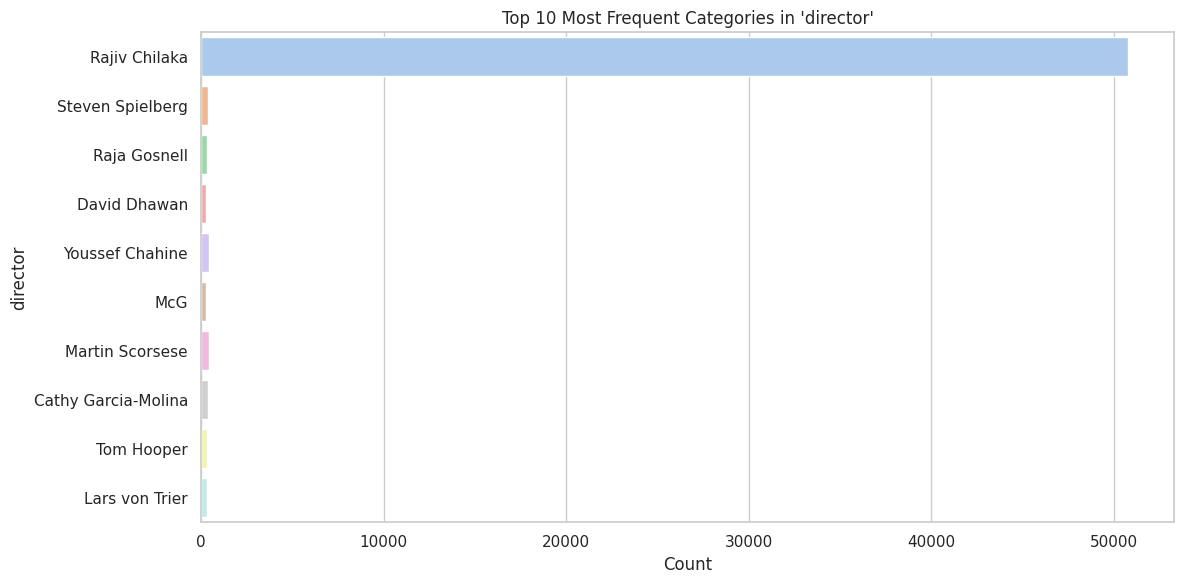

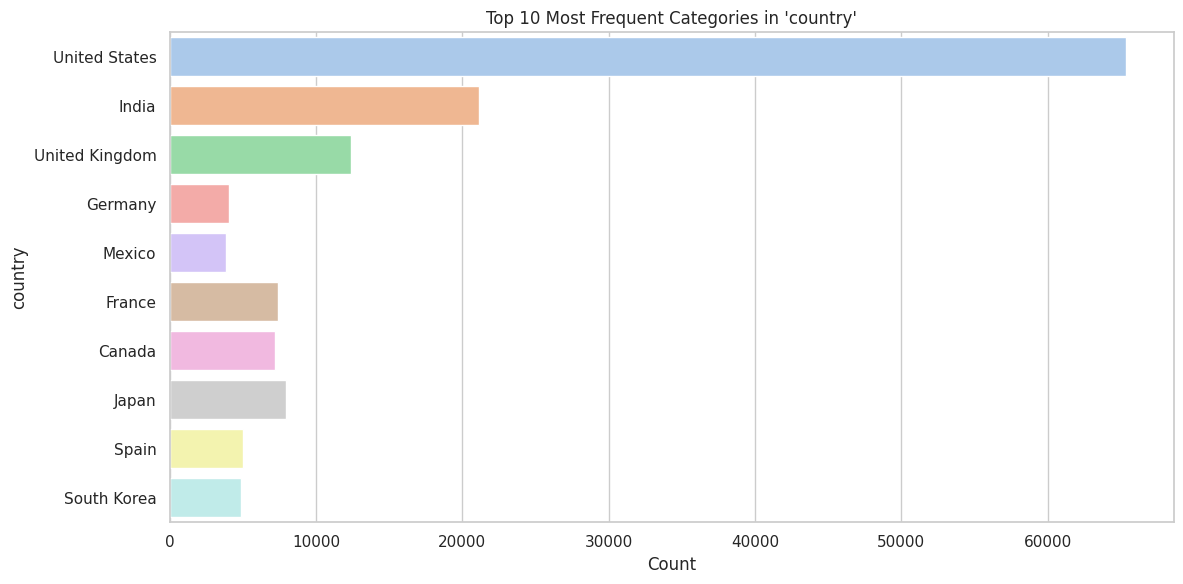

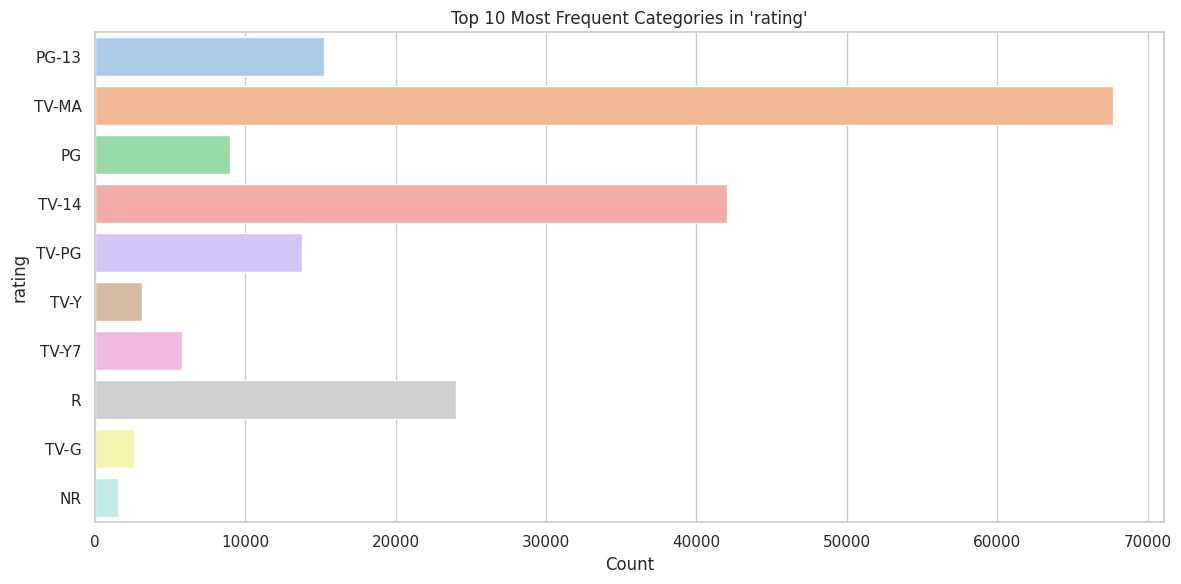

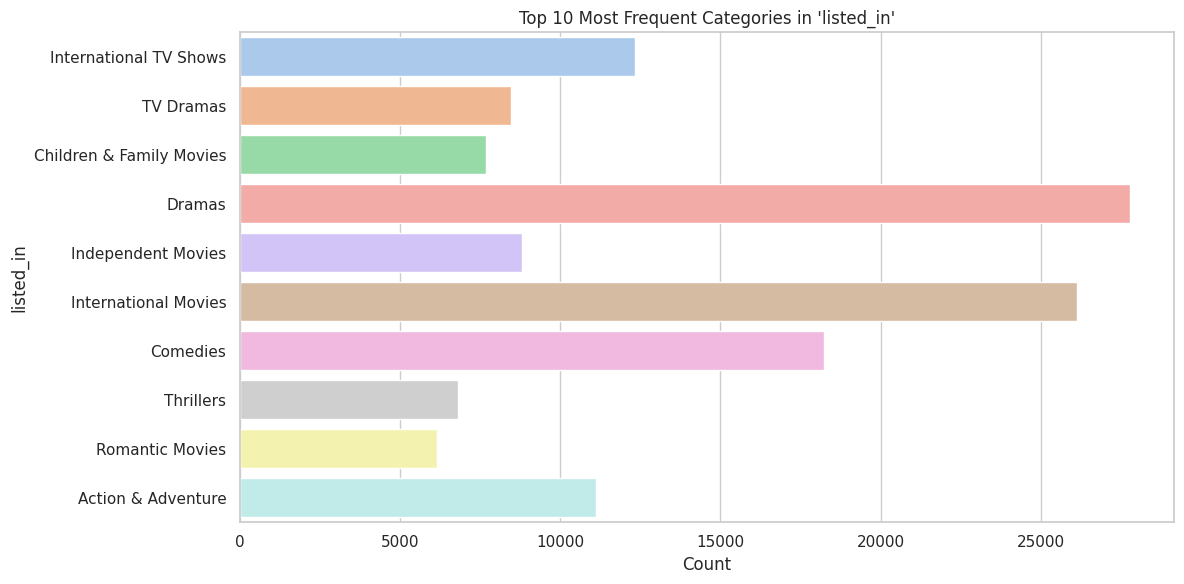

In [ ]:
sns.set(style="whitegrid")
categorical_columns = ['director', 'country', 'rating', 'listed_in']

for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    top_values = df_unnested[col].value_counts().nlargest(10).index
    sns.countplot(data=df_unnested[df_unnested[col].isin(top_values)],
                  y=col, hue=col, legend=False, palette="pastel")
    plt.title(f"Top 10 Most Frequent Categories in '{col}'")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()



<ipython-input-52-f813c1e340e6>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tv_weekly, x='week_added', y='count', palette='Blues_d')


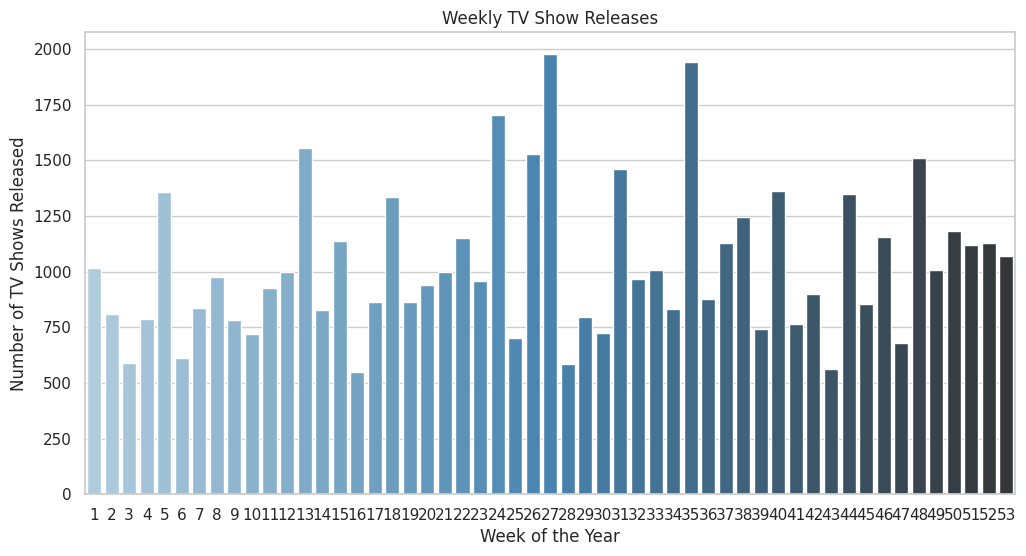

<ipython-input-52-f813c1e340e6>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=movies_weekly, x='week_added', y='count', palette='Greens_d')


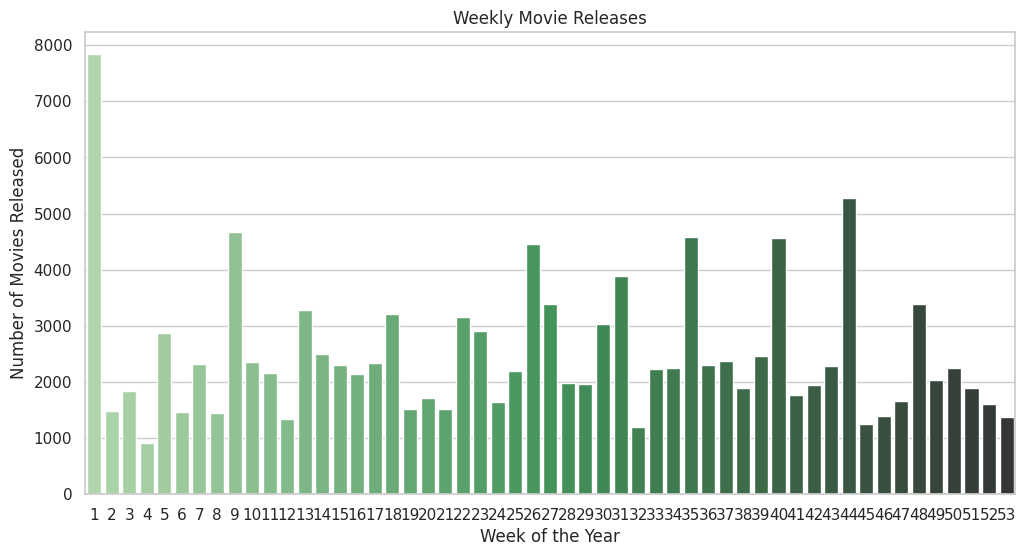

<ipython-input-52-f813c1e340e6>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tv_monthly, x='month_added', y='count', palette='Blues_d')


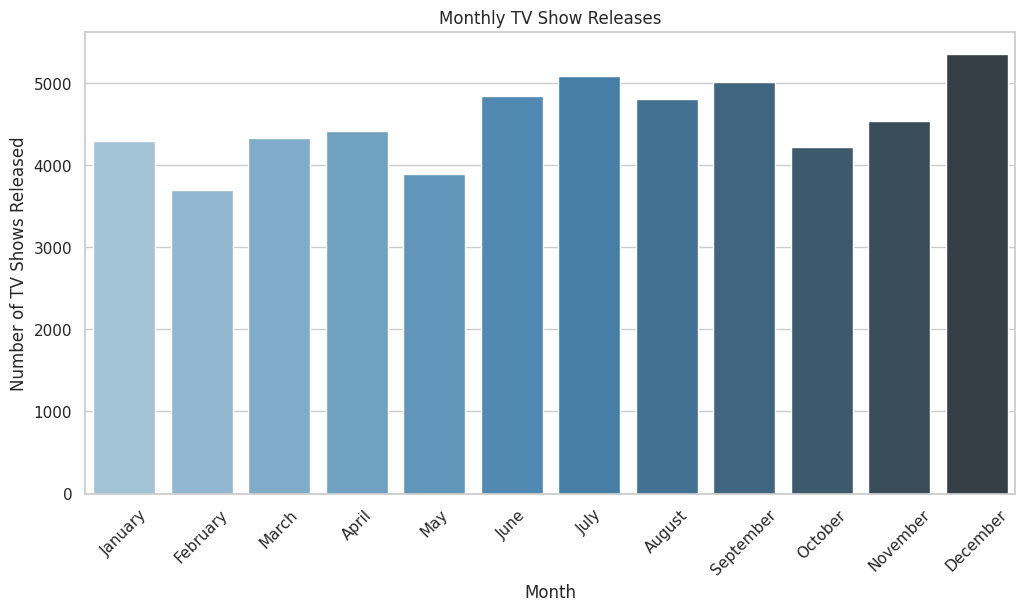

<ipython-input-52-f813c1e340e6>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=movies_monthly, x='month_added', y='count', palette='Greens_d')


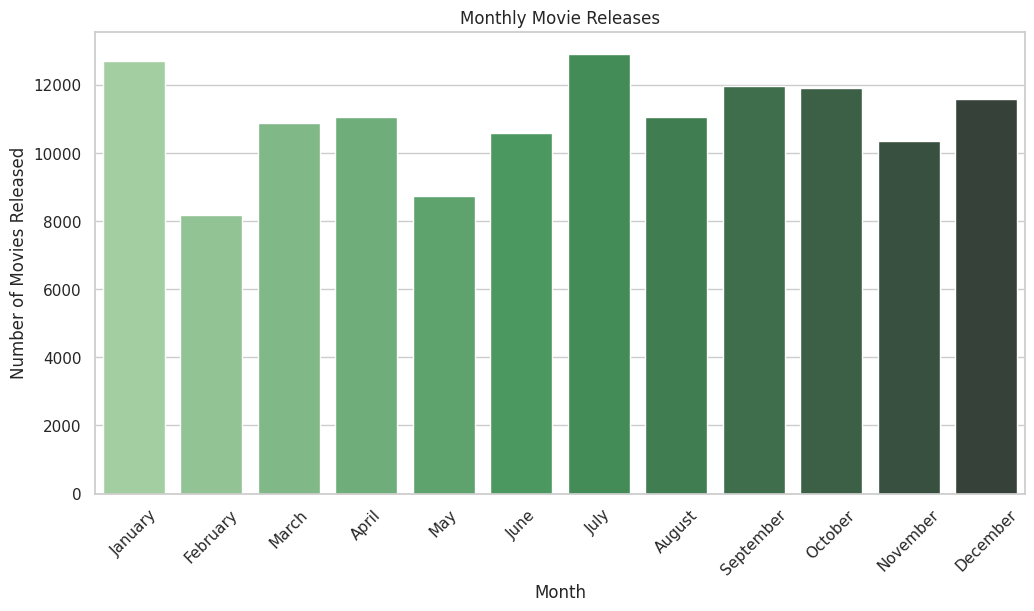

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure that 'date_added' is in datetime format
df_unnested['date_added'] = pd.to_datetime(df_unnested['date_added'], errors='coerce')

# Create new columns:
# 1. Week of the year when the content was added (using ISO calendar week)
df_unnested['week_added'] = df_unnested['date_added'].dt.isocalendar().week
# 2. Month name when the content was added
df_unnested['month_added'] = df_unnested['date_added'].dt.month_name()

# Separate the dataset into TV Shows and Movies
tv_shows = df_unnested[df_unnested['type'] == 'TV Show']
movies   = df_unnested[df_unnested['type'] == 'Movie']

####################################
# Part A: Analysis by Week
####################################

# Group by week and count number of releases for TV Shows
tv_weekly = tv_shows.groupby('week_added').size().reset_index(name='count')
# Group by week and count number of releases for Movies
movies_weekly = movies.groupby('week_added').size().reset_index(name='count')

# Plot: TV Shows by Week
plt.figure(figsize=(12, 6))
sns.barplot(data=tv_weekly, x='week_added', y='count', palette='Blues_d')
plt.title("Weekly TV Show Releases")
plt.xlabel("Week of the Year")
plt.ylabel("Number of TV Shows Released")
plt.show()

# Plot: Movies by Week
plt.figure(figsize=(12, 6))
sns.barplot(data=movies_weekly, x='week_added', y='count', palette='Greens_d')
plt.title("Weekly Movie Releases")
plt.xlabel("Week of the Year")
plt.ylabel("Number of Movies Released")
plt.show()

####################################
# Part B: Analysis by Month
####################################

# Group by month and count number of releases for TV Shows
tv_monthly = tv_shows.groupby('month_added').size().reset_index(name='count')
# Group by month and count number of releases for Movies
movies_monthly = movies.groupby('month_added').size().reset_index(name='count')

# To ensure the months are in calendar order, define an ordered categorical type:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

tv_monthly['month_added'] = pd.Categorical(tv_monthly['month_added'], categories=month_order, ordered=True)
tv_monthly = tv_monthly.sort_values('month_added')

movies_monthly['month_added'] = pd.Categorical(movies_monthly['month_added'], categories=month_order, ordered=True)
movies_monthly = movies_monthly.sort_values('month_added')

# Plot: TV Shows by Month
plt.figure(figsize=(12, 6))
sns.barplot(data=tv_monthly, x='month_added', y='count', palette='Blues_d')
plt.title("Monthly TV Show Releases")
plt.xlabel("Month")
plt.ylabel("Number of TV Shows Released")
plt.xticks(rotation=45)
plt.show()

# Plot: Movies by Month
plt.figure(figsize=(12, 6))
sns.barplot(data=movies_monthly, x='month_added', y='count', palette='Greens_d')
plt.title("Monthly Movie Releases")
plt.xlabel("Month")
plt.ylabel("Number of Movies Released")
plt.xticks(rotation=45)
plt.show()



**Insight from the Weekly TV Show Releases Graph:**
The bar chart depicts the distribution of TV show releases on Netflix across the 52 weeks of the year. The data reveals that:


*  ** Weeks 26 and 35** show the **highest number of TV show releases**, peaking at over
2000 releases during those weeks. This suggests a strategic content drop around the **mid-year (late June)** and **early September**, likely to engage audiences during **summer breaks or back-to-school periods**.
*  There is a **gradual increase in releases from week 1 to mid-year**, indicating a buildup of content availability.
*  The **lowest release activity** is observed around **weeks 14–16 and 44,** hinting at potential periods of reduced user engagement or strategic pauses before major drops.
*  **Weeks 47–52 (year-end)** maintain a steady number of releases, possibly to capitalize on **holiday season viewership**.

**Insights from the Weekly Movie Release Trends on Netflix**

1. **Peak Release Week**:Week 1 has a massive spike with over **7,500** movies released — significantly higher than any other week.This suggests Netflix likely does a **large batch release at the start of the year**, possibly due to licensing rollovers or a content refresh.

2.  **Other High Activity Weeks:**Noticeable spikes also occur during:
Week 10,
Week 26,
Week 35,
Week 44.
These may align with seasonal content drops (e.g., Spring Break, Summer, Back to School, Pre-Holiday push).

3. **Lower Activity Periods:**Weeks like 14–16, 32–34, and weeks 48–53 show lower movie releases.This might reflect planning lulls, end-of-quarter transitions, or scheduling gaps near the year-end.







**Insight From Monthly TV Show Releases**


*  **December** stands out as the peak month for TV show releases, with over **5300 releases**, indicating a strategic content push during the **holiday season** when user engagement is high.
*   Other high-performing months include **July, September, and June**, all exceeding **4800 releases**, likely targeting summer holidays and back-to-school periods.
*   **February and May** show the **lowest number of releases** (below 4000), suggesting these are less prioritized periods for TV show launches.
*   Overall, there’s a noticeable upward trend in the **second half of the year**, especially from **June to December**, aligning with increased viewer availability.





**Insight From Monthly Movie Release:**



*  **January and July** are the **top months for movie releases**, both **crossing 12,500** releases, potentially to capitalize on **New Year engagement and mid-year breaks**.
*   **February sees the lowest count**, under **8500 movies**, possibly reflecting post-holiday slowdowns in content drops.
*   There is a consistent and strong release volume throughout **March to October**, with each month hovering around **10,000–12,000 releases**.
*  The release strategy for movies appears to be **more evenly distributed** than TV shows, with slight dips and spikes but no prolonged low periods.





**For Numerical Variables:**

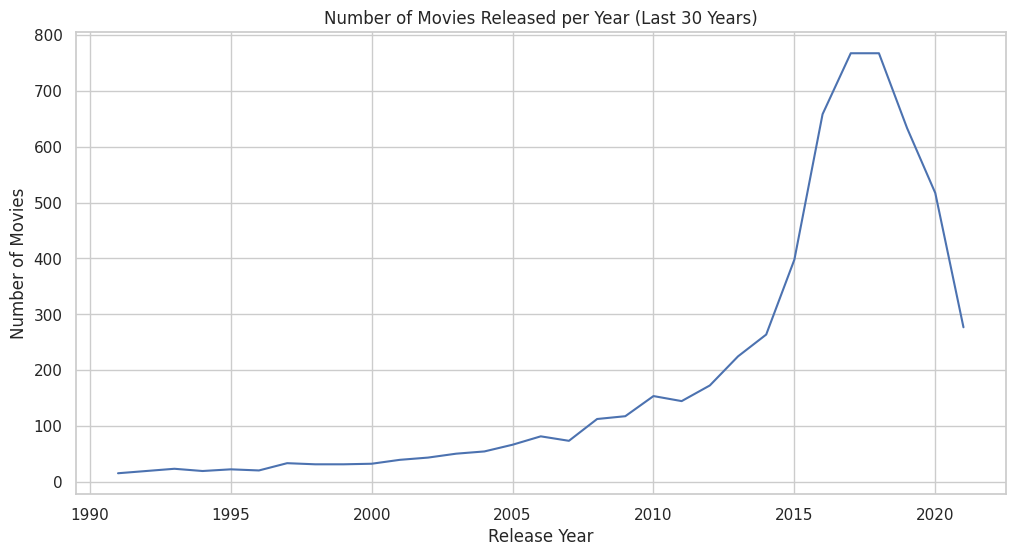

In [50]:
#How has the number of movies released per year changed over the last 20-30 years?
# Movies released per year (last 30 years)
recent_movies = df[df['type'] == 'Movie']
recent_movies = recent_movies[recent_movies['release_year'] >= (df['release_year'].max() - 30)]
movie_counts = recent_movies.groupby('release_year').size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=movie_counts, x='release_year', y='count')
plt.title("Number of Movies Released per Year (Last 30 Years)")
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.show()


 **Insights:**Number of Movies Released per Year (Last 30 Years)

1.   **Steady Growth Until 2010**:From 1990 to around 2010, the number of movie releases grew gradually, with fewer than 200 movies added annually.Netflix was primarily a DVD rental service in its early years, so the digital content library was still modest.
2.   **Rapid Surge (2010–2017):**A significant spike in releases occurred between **2014 and 2017**, peaking around **2017–2018** with nearly **770 movies released**.This aligns with Netflix’s aggressive push into original content and global expansion during this period.
3.   **Decline Post-2018:**There is a noticeable **decline from 2019 onward**, especially in **2020 and 2021**, likely due to:Production delays caused by the **COVID-19 pandemic**.A possible shift in focus to **TV shows, regional content, or quality over quantity**







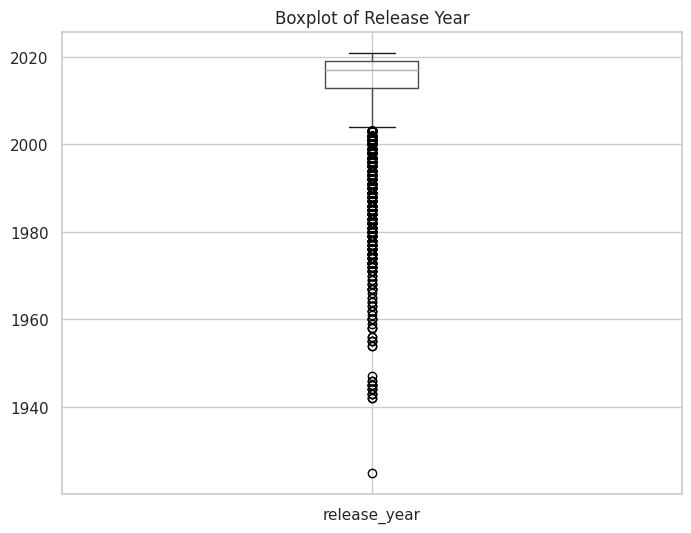

In [ ]:
#Box plot for release year
# Investigate potential outliers in numerical columns using boxplots
numerical_cols = ['release_year']
df.boxplot(column=numerical_cols, figsize=(8, 6))
plt.title("Boxplot of Release Year")
plt.show()

**Insight:**The majority of Netflix content in the dataset was released after the year **2000**, with the **median release year around 2015**. This suggests a strong focus on more recent content.
The boxplot may also show a few **outliers on the lower end**, indicating that Netflix hosts a small selection of **classic or older titles** dating back several decades. These older entries can add variety and appeal to niche audiences.

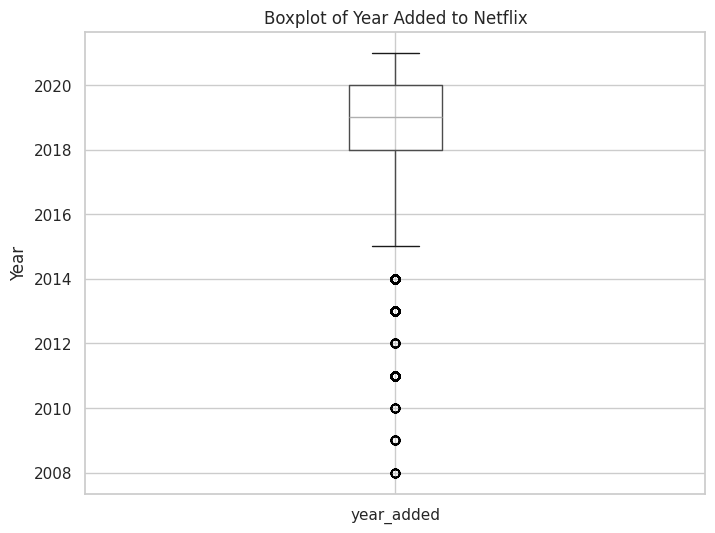

In [ ]:
#Box plot for added year
# Investigate potential outliers in numerical columns using boxplots
df_unnested.boxplot(column=['year_added'], figsize=(8, 6))
plt.title("Boxplot of Year Added to Netflix")
plt.ylabel("Year")
plt.show()


**Insight:**The boxplot for the year_added column shows the distribution of the years in which content was added to Netflix. Here's what you can typically interpret:


1. **Main Concentration (2017–2020):**Most content on Netflix was added between **2017 and 2020**, as shown by the interquartile range (IQR) — the box in the plot.The **median** (line inside the box) lies close to 2019, suggesting that 2019 was a peak year for content addition.
2. **Outliers (Before 2016):**Data points below the lower whisker (from 2015 and earlier) are considered outliers, meaning content was rarely added in those earlier years.This shows Netflix's **aggressive content growth only began in recent years**, possibly as part of its global expansion and content investment strategy.
3. **Growth Insight:**The plot reflects a sharp increase in platform activity post-2016, aligning with Netflix's push for original and exclusive content.
4. **Strategic Implication:**Older content is limited and might be appealing to users seeking classics, suggesting an opportunity for Netflix to explore or license older popular titles.





# **Bivariate Analysis**

**Categorical vs. Categorical**

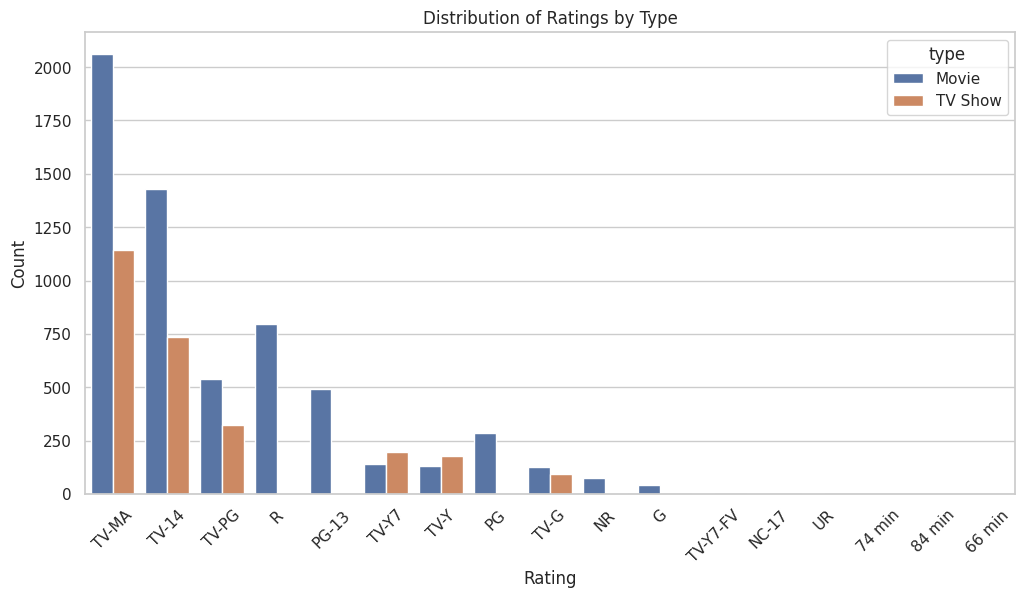

In [ ]:
#Do movies and TV shows differ in terms of the ratings they receive?

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='rating', hue='type', order=df['rating'].value_counts().index)
plt.title("Distribution of Ratings by Type")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


**Insights:**Distribution of Ratings by Type (Movie vs TV Show):

*   **TV-MA** is the **most common rating** overall, especially for** Movies** — indicating a large portion of Netflix content is targeted at mature audiences.
*   **TV-14** is the **second most frequent rating**, also more common in Movies, though **TV Shows** have a significant share here too — this suggests that teen-appropriate content is also widely available across both formats.
*  **TV-PG**, **R**, and **PG-13** ratings are **predominantly found in Movies**, reinforcing the trend that Movies span a broader range of traditional film industry ratings.
*  Ratings like **TV-Y7**, **TV-Y**, and **TV-G** appear mostly in **TV Shows**, which aligns with Netflix having a notable selection of children’s shows in series format.





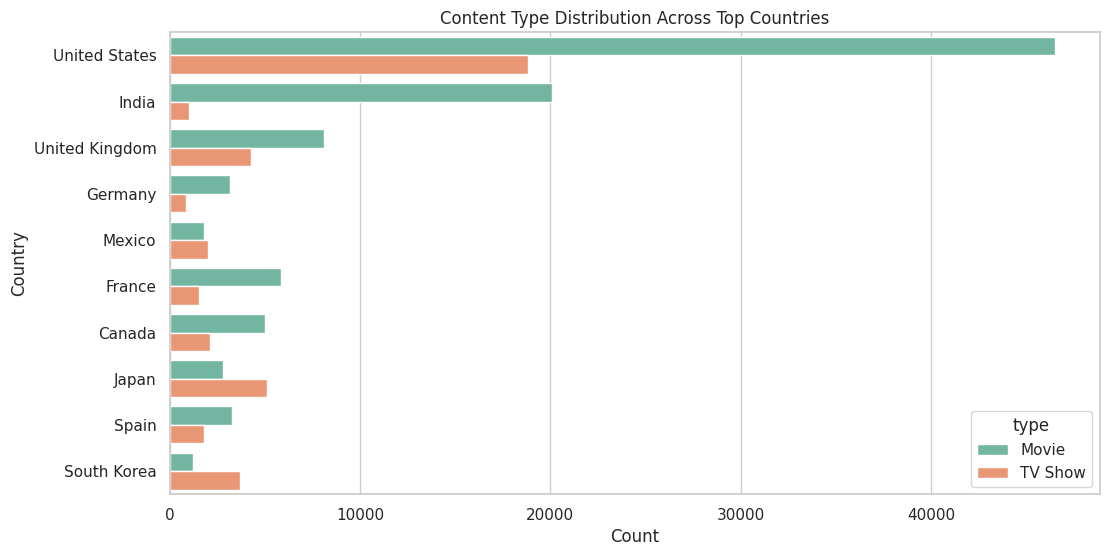

In [ ]:
#Which countries produce more TV Shows compared to Movies?
top_countries = df_unnested['country'].value_counts().nlargest(10).index
plt.figure(figsize=(12,6))
sns.countplot(data=df_unnested[df_unnested['country'].isin(top_countries)],
              y='country', hue='type', palette='Set2')
plt.title("Content Type Distribution Across Top Countries")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

**Insight:**Content Type Distribution Across Top Countries:

*  **United States** dominates Netflix's content library with the **highest number of titles**,both **Movies** and **TV Shows**,showing its central role in global content production and licensing.
*   **India** has a very high number of **movies**,but **very few TV shows**,suggesting a **film-heavy contribution** to Netflix,alligning with Bollywood's massive movie output.
*  **United Kingdom** is a strong contributor in both categories,but still lean more towards movies than TV shows.
*  **Japan and South Korea** are among the few contries,where **TV Shows nearly match or exceed movies**,likely due to global popularity of **anime** and **K-dramas**.





 **Categorical vs. Numeric**

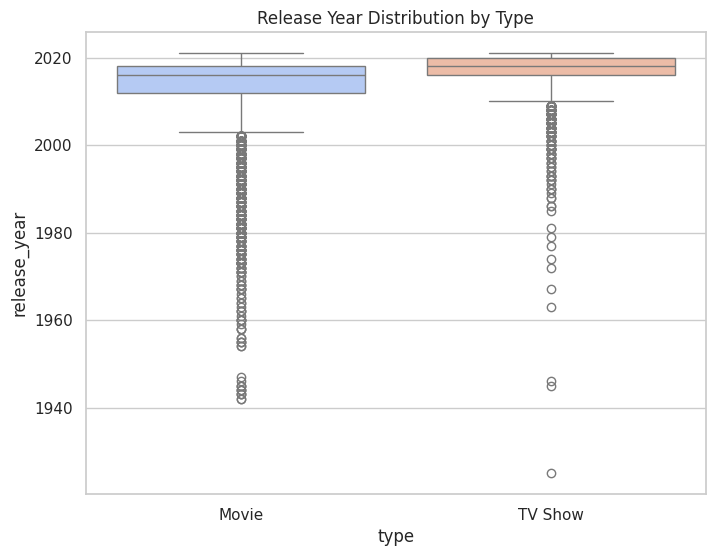

In [ ]:
#Do movies and TV shows differ in average release year?
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='type', y='release_year', hue='type', palette='coolwarm', legend=False)
plt.title("Release Year Distribution by Type")
plt.show()


**Insight:**Release Year Distribution by Content Type

*   **TV Shows** tend to be more **recently released** compared to Movies. The median release year for TV Shows is slightly higher, indicating a stronger focus on newer content.
*   **Movies** have a **wider distribution** in release years, including significantly more outliers from earlier decades (e.g., 1940s–1980s), suggesting that Netflix hosts a **broader historical catalog** of films.
*   Both types show a concentration of releases post-2000, but **TV Shows are more tightly clustered** in the 2010s and beyond.
*   The longer tail of older movies suggests that Netflix **preserves more classic cinema** than it does with older TV content.





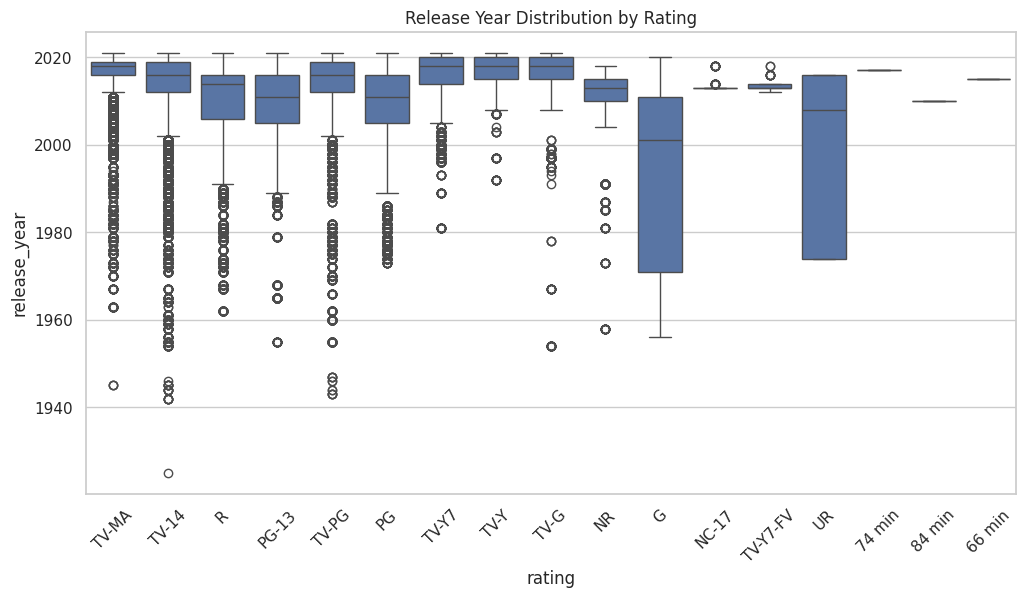

In [53]:
#Is there a trend in release years based on content ratings?
plt.figure(figsize=(12,6))
sns.boxplot(data=df_unnested, x='rating', y='release_year', order=df_unnested['rating'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Release Year Distribution by Rating")
plt.show()


**Insights:**Content Release Trends Across Ratings

*   Most content across all rating categories is concentrated in the **2000s and 2010s**, reflecting Netflix’s focus on modern content.
*   **TV-MA** (Mature Audience) and **TV-14** ratings have the **widest distribution**, with numerous older titles and a strong presence across decades — indicating a rich variety of mature and teen-oriented content on the platform.
*   **G-rated** (General Audience) and **NR (Not Rated)** content show a broader spread, including many older titles, possibly reflecting older family-friendly or unclassified classics.
*   **PG-13**, **R**, and **TV-PG** ratings also span multiple decades but are more tightly clustered toward the recent years, showing a balanced offering for wider audiences.





# **Multivariate & Correlation Analysis**